In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_properties_cleaned_v1.csv')

In [4]:
df.duplicated().sum()

122

In [5]:
df.head(1)
# focus is on -> areaWithType, additionalRoom, agePossession, furnishDetails, features 

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,m3m sierra 68,sector 68,1.05,8536.0,1230.0,Super Built up area 1230(114.27 sq.m.)Built Up area: 1200 sq.ft. (111.48 sq.m.)Carpet area: 1000 sq.ft. (92.9 sq.m.),2,2,2,not available,11.0,North-East,0 to 1 Year Old,"['Airia Mall', 'Sohna Road', 'Golf Course Extension Road', 'Alpine Convent School', 'KIIT College of Engineering', 'MKD Hospital', 'Indira Gandhi International Airport', 'Lemon Tree Hotel, Sohna Road', 'SkyJumper Trampoline Park', 'DLF Golf and Country Club']","['2 Wardrobe', '3 Fan', '1 Exhaust Fan', '1 Geyser', '1 Light', '1 Modular Kitchen', '1 Chimney', '3 Curtains', 'No AC', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Water purifier', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"


## 1. areaWithType

In [6]:
df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
3290,1.60,1578.0,Super Built up area 1578(146.6 sq.m.)
3082,18.00,4500.0,Plot area 500(418.06 sq.m.)
1642,1.77,2408.0,Super Built up area 2408(223.71 sq.m.)
720,2.50,2093.0,Super Built up area 2093(194.45 sq.m.)
2550,0.47,605.0,Carpet area: 605 (56.21 sq.m.)


In [7]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [8]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [9]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [10]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [11]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3800,1.42,flat,1650.0,Super Built up area 1650(153.29 sq.m.),1650.0,NaN,NaN
3744,0.60,flat,900.0,Carpet area: 900 (83.61 sq.m.),NaN,NaN,900.0
654,1.55,flat,1150.0,Super Built up area 1150(106.84 sq.m.),1150.0,NaN,NaN
2068,1.42,flat,2919.0,Super Built up area 2364(219.62 sq.m.),2364.0,NaN,NaN
3709,0.70,flat,1500.0,Built Up area: 1468 (136.38 sq.m.)Carpet area: 1150 sq.ft. (106.84 sq.m.),NaN,1468.0,1150.0


In [12]:
df.duplicated().sum()

122

In [13]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [14]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3,11.50,house,6500.0,Plot area 3762(349.5 sq.m.)Built Up area: 9000 sq.ft. (836.13 sq.m.)Carpet area: 6500 sq.ft. (603.87 sq.m.),NaN,9000.0,6500.0
13,6.80,house,3240.0,Plot area 360(301.01 sq.m.),NaN,NaN,NaN
14,6.50,house,1800.0,Plot area 200(167.23 sq.m.),NaN,NaN,NaN
17,1.50,house,1426.0,Plot area 1426(132.48 sq.m.),NaN,NaN,NaN
31,8.31,house,3438.0,Plot area 382(319.4 sq.m.),NaN,NaN,NaN


In [15]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2616
carpet_area            1859
dtype: int64

In [16]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [17]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
13,6.80,house,3240.0,Plot area 360(301.01 sq.m.),NaN,NaN,NaN
14,6.50,house,1800.0,Plot area 200(167.23 sq.m.),NaN,NaN,NaN
17,1.50,house,1426.0,Plot area 1426(132.48 sq.m.),NaN,NaN,NaN
31,8.31,house,3438.0,Plot area 382(319.4 sq.m.),NaN,NaN,NaN
36,6.20,house,2430.0,Plot area 270(225.75 sq.m.),NaN,NaN,NaN


In [18]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [19]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [20]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)

In [21]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
13,6.80,house,3240.0,Plot area 360(301.01 sq.m.),NaN,360.00,NaN
14,6.50,house,1800.0,Plot area 200(167.23 sq.m.),NaN,200.00,NaN
17,1.50,house,1426.0,Plot area 1426(132.48 sq.m.),NaN,1426.00,NaN
31,8.31,house,3438.0,Plot area 382(319.4 sq.m.),NaN,382.00,NaN
36,6.20,house,2430.0,Plot area 270(225.75 sq.m.),NaN,270.00,NaN
43,3.40,house,2250.0,Plot area 250(209.03 sq.m.),NaN,250.00,NaN
58,5.51,house,3243.0,Plot area 361(301.84 sq.m.),NaN,361.00,NaN
62,8.25,house,1800.0,Plot area 200(167.23 sq.m.),NaN,200.00,NaN
65,8.10,house,2295.0,Plot area 255(213.21 sq.m.),NaN,255.00,NaN
72,9.40,house,3600.0,Plot area 400(334.45 sq.m.),NaN,400.00,NaN


In [22]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [23]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [24]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
13,6.80,house,3240.0,Plot area 360(301.01 sq.m.),NaN,3240.00,NaN
14,6.50,house,1800.0,Plot area 200(167.23 sq.m.),NaN,1800.00,NaN
17,1.50,house,1426.0,Plot area 1426(132.48 sq.m.),NaN,1426.00,NaN
31,8.31,house,3438.0,Plot area 382(319.4 sq.m.),NaN,3438.00,NaN
36,6.20,house,2430.0,Plot area 270(225.75 sq.m.),NaN,2430.00,NaN
43,3.40,house,2250.0,Plot area 250(209.03 sq.m.),NaN,2250.00,NaN
58,5.51,house,3243.0,Plot area 361(301.84 sq.m.),NaN,3249.00,NaN
62,8.25,house,1800.0,Plot area 200(167.23 sq.m.),NaN,1800.00,NaN
65,8.10,house,2295.0,Plot area 255(213.21 sq.m.),NaN,2295.00,NaN
72,9.40,house,3600.0,Plot area 400(334.45 sq.m.),NaN,3600.00,NaN


In [25]:
# update the original dataframe
df.update(all_nan_df)

In [26]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2070
carpet_area            1859
dtype: int64

In [27]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,flat,m3m sierra 68,sector 68,1.05,8536.0,1230.0,Super Built up area 1230(114.27 sq.m.)Built Up area: 1200 sq.ft. (111.48 sq.m.)Carpet area: 1000 sq.ft. (92.9 sq.m.),2,2,2,not available,11.0,North-East,0 to 1 Year Old,"['Airia Mall', 'Sohna Road', 'Golf Course Extension Road', 'Alpine Convent School', 'KIIT College of Engineering', 'MKD Hospital', 'Indira Gandhi International Airport', 'Lemon Tree Hotel, Sohna Road', 'SkyJumper Trampoline Park', 'DLF Golf and Country Club']","['2 Wardrobe', '3 Fan', '1 Exhaust Fan', '1 Geyser', '1 Light', '1 Modular Kitchen', '1 Chimney', '3 Curtains', 'No AC', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Water purifier', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",1230.0,1200.0,1000.0
1,flat,aipl the peaceful homes,sector 70a,2.40,11162.0,2150.0,Super Built up area 2150(199.74 sq.m.),3,3,3,servant room,11.0,South-West,1 to 5 Year Old,"['Airia Mall', 'Golf Corse Ext. Rd.', 'National Highway-48', 'Indus World School', 'Gurugram University', 'Ananta Hospital', 'Indira Gandhi International Airport', 'DLF Corporate Greens', 'IMT Manesar', 'Hyatt Regency Gurgaon', 'SkyJumper Trampoline Park']","['5 Fan', '3 Geyser', '6 Light', '3 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",2150.0,NaN,NaN
2,flat,suncity avenue 76,sector 76,0.75,10204.0,735.0,Super Built up area 735(68.28 sq.m.),2,2,2,not available,11.0,NaN,By 2023,"['Omaxe Gurgaon Mall', 'Gurugram University', 'Euro International School, Sector 84', 'Park Hospital', 'Indira Gandhi Intl Airport', 'Hyatt Regency Gurgaon']",[],NaN,735.0,NaN,NaN
3,house,ansal sushant lok plots,sector 43,11.50,17692.0,6500.0,Plot area 3762(349.5 sq.m.)Built Up area: 9000 sq.ft. (836.13 sq.m.)Carpet area: 6500 sq.ft. (603.87 sq.m.),7,8,3+,"servant room,store room,pooja room",3.0,NaN,10+ Year Old,"['Iffco chowk metro station', 'Huda city centre metro station', 'Standard chartered ATM', 'Kotak mahindra bank ATM', 'Icici bank ATM', 'Rbs ATM', 'Axis bank ATM', 'Punjab national bank ATM', 'Max Hospital', 'Dr. Kutbuddin Akbary', 'Sitaram Bhartia', 'Umkal Hospital', 'Dr. Naval Mendiratta', 'Fortis Memorial Research Institute Fortis Vivekanand Hospital', 'Centre For Sight Gurgaon Sector 29', 'Sidhesh Hospital Gurgaon', 'Chikitsa', 'Guardian Pharmacy', 'Axis bank', 'Icici bank', 'Hdfc bank', 'Naveidyam', 'Pizza Hut', 'CCD', 'Drunken Monkey', 'Belgian Waffle', 'The Chicken Boat', 'Starbucks', 'Blue Tokai Coffee Roasters', 'Balaji Vegetarian Paradise', 'Dighent cafe', 'Fat', 'Nowhere Brewpub and cafe', 'Barbecue Grill', 'Roots', 'PWO house', 'MoB Ministory of Beer', 'Park Baluchi', 'Beer & Whisky Bar', 'B

## 2.additionalRoom

In [28]:
df['additionalRoom'].value_counts()

additionalRoom
not available                                    1587
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
study room,servant room                            99
store room                                         99
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
pooja room,st

In [29]:
# additional room
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [30]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
3347,not available,0,0,0,0,0
2973,not available,0,0,0,0,0
724,not available,0,0,0,0,0
2042,not available,0,0,0,0,0
2352,"store room,servant room",0,1,1,0,0


In [31]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,m3m sierra 68,sector 68,1.05,8536.0,1230.0,Super Built up area 1230(114.27 sq.m.)Built Up area: 1200 sq.ft. (111.48 sq.m.)Carpet area: 1000 sq.ft. (92.9 sq.m.),2,2,2,not available,11.0,North-East,0 to 1 Year Old,"['Airia Mall', 'Sohna Road', 'Golf Course Extension Road', 'Alpine Convent School', 'KIIT College of Engineering', 'MKD Hospital', 'Indira Gandhi International Airport', 'Lemon Tree Hotel, Sohna Road', 'SkyJumper Trampoline Park', 'DLF Golf and Country Club']","['2 Wardrobe', '3 Fan', '1 Exhaust Fan', '1 Geyser', '1 Light', '1 Modular Kitchen', '1 Chimney', '3 Curtains', 'No AC', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Water purifier', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",1230.0,1200.0,1000.0,0,0,0,0,0
1,flat,aipl the peaceful homes,sector 70a,2.40,11162.0,2150.0,Super Built up area 2150(199.74 sq.m.),3,3,3,servant room,11.0,South-West,1 to 5 Year Old,"['Airia Mall', 'Golf Corse Ext. Rd.', 'National Highway-48', 'Indus World School', 'Gurugram University', 'Ananta Hospital', 'Indira Gandhi International Airport', 'DLF Corporate Greens', 'IMT Manesar', 'Hyatt Regency Gurgaon', 'SkyJumper Trampoline Park']","['5 Fan', '3 Geyser', '6 Light', '3 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",2150.0,NaN,NaN,0,1,0,0,0
2,flat,suncity avenue 76,sector 76,0.75,10204.0,735.0,Super Built up area 735(68.28 sq.m.),2,2,2,not available,11.0,NaN,By 2023,"['Omaxe Gurgaon Mall', 'Gurugram University', 'Euro International School, Sector 84', 'Park Hospital', 'Indira Gandhi Intl Airport', 'Hyatt Regency Gurgaon']",[],NaN,735.0,NaN,NaN,0,0,0,0,0
3,house,ansal sushant lok plots,sector 43,11.50,17692.0,6500.0,Plot area 3762(349.5 sq.m.)Built Up area: 9000 sq.ft. (836.13 sq.m.)Carpet area: 6500 sq.ft. (603.87 sq.m.),7,8,3+,"servant room,store room,pooja room",3.0,NaN,10+ Year Old,"['Iffco chowk metro station', 'Huda city centre metro station', 'Standard chartered ATM', 'Kotak mahindra bank ATM', 'Icici bank ATM', 'Rbs ATM', 'Axis bank ATM', 'Punjab national bank ATM', 'Max Hospital', 'Dr. Kutbuddin Akbary', 'Sitaram Bhartia', 'Umkal Hospital', 'Dr. Naval Mendiratta', 'Fortis Memorial Research Institute Fortis Vivekanand Hospital', 'Centre For Sight Gurgaon Sector 29', 'Sidhesh Hospital Gurgaon', 'Chikitsa', 'Guardian Pharmacy', 'Axis bank', 'Icici bank', 'Hdfc bank', 'Naveidyam', 'Pizza Hut', 'CCD', 'Drunken Monkey', 'Belgian Waffle', 'The Chicken Boat', 'Starbucks', 'Blue Tokai Coffee Roasters', 'Balaji Vegetarian Paradise', 'Dighent cafe', 'Fat', 'Nowhere Brewpub and cafe', 'Barbecue Grill', 'Ro

## 3.agePossession

In [32]:
df['agePossession'].value_counts()

agePossession
1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec 2023                22
By 2023                 19
By 2024                 17
Dec 2024                16
Mar 2024                14
Oct 2024                 8
Jan 2024                 8
Jun 2024                 7
Dec 2025                 7
Aug 2023                 7
Nov 2023                 5
Oct 2023                 4
Jul 2024                 4
Sep 2023                 4
By 2025                  4
Aug 2024                 4
May 2024                 3
Jan 2025                 3
Nov 2024                 3
Feb 2024                 3
Jan 2026                 2
Mar 2025                 2
Jul 2025                 2
Sep 2025                 2
Jun 2027                 2
Aug 2025                 2
Jul 2027                 2
By 2027                  2
Oct 2025      

In [33]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [34]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [35]:
df['agePossession'].value_counts()

agePossession
Relatively New        1676
New Property           626
Moderately Old         575
Undefined              333
Old Property           310
Under Construction     283
Name: count, dtype: int64

In [36]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,m3m sierra 68,sector 68,1.05,8536.0,1230.0,Super Built up area 1230(114.27 sq.m.)Built Up area: 1200 sq.ft. (111.48 sq.m.)Carpet area: 1000 sq.ft. (92.9 sq.m.),2,2,2,not available,11.0,North-East,New Property,"['Airia Mall', 'Sohna Road', 'Golf Course Extension Road', 'Alpine Convent School', 'KIIT College of Engineering', 'MKD Hospital', 'Indira Gandhi International Airport', 'Lemon Tree Hotel, Sohna Road', 'SkyJumper Trampoline Park', 'DLF Golf and Country Club']","['2 Wardrobe', '3 Fan', '1 Exhaust Fan', '1 Geyser', '1 Light', '1 Modular Kitchen', '1 Chimney', '3 Curtains', 'No AC', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Water purifier', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",1230.0,1200.0,1000.0,0,0,0,0,0
1,flat,aipl the peaceful homes,sector 70a,2.40,11162.0,2150.0,Super Built up area 2150(199.74 sq.m.),3,3,3,servant room,11.0,South-West,Relatively New,"['Airia Mall', 'Golf Corse Ext. Rd.', 'National Highway-48', 'Indus World School', 'Gurugram University', 'Ananta Hospital', 'Indira Gandhi International Airport', 'DLF Corporate Greens', 'IMT Manesar', 'Hyatt Regency Gurgaon', 'SkyJumper Trampoline Park']","['5 Fan', '3 Geyser', '6 Light', '3 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",2150.0,NaN,NaN,0,1,0,0,0
2,flat,suncity avenue 76,sector 76,0.75,10204.0,735.0,Super Built up area 735(68.28 sq.m.),2,2,2,not available,11.0,NaN,Under Construction,"['Omaxe Gurgaon Mall', 'Gurugram University', 'Euro International School, Sector 84', 'Park Hospital', 'Indira Gandhi Intl Airport', 'Hyatt Regency Gurgaon']",[],NaN,735.0,NaN,NaN,0,0,0,0,0
3,house,ansal sushant lok plots,sector 43,11.50,17692.0,6500.0,Plot area 3762(349.5 sq.m.)Built Up area: 9000 sq.ft. (836.13 sq.m.)Carpet area: 6500 sq.ft. (603.87 sq.m.),7,8,3+,"servant room,store room,pooja room",3.0,NaN,Old Property,"['Iffco chowk metro station', 'Huda city centre metro station', 'Standard chartered ATM', 'Kotak mahindra bank ATM', 'Icici bank ATM', 'Rbs ATM', 'Axis bank ATM', 'Punjab national bank ATM', 'Max Hospital', 'Dr. Kutbuddin Akbary', 'Sitaram Bhartia', 'Umkal Hospital', 'Dr. Naval Mendiratta', 'Fortis Memorial Research Institute Fortis Vivekanand Hospital', 'Centre For Sight Gurgaon Sector 29', 'Sidhesh Hospital Gurgaon', 'Chikitsa', 'Guardian Pharmacy', 'Axis bank', 'Icici bank', 'Hdfc bank', 'Naveidyam', 'Pizza Hut', 'CCD', 'Drunken Monkey', 'Belgian Waffle', 'The Chicken Boat', 'Starbucks', 'Blue Tokai Coffee Roasters', 'Balaji Vegetarian Paradise', 'Dighent cafe', 'Fat', 'Nowhere Brewpub and cafe', 'Barbecue Gril

## 4.furnishDetails

In [37]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
308,"['13 Light', '8 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
2756,"['7 Fan', '9 Light', '6 AC', '1 Modular Kitchen', '2 Wardrobe', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Separate entry for servant room', 'Swimming Pool', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center', 'Water softening plant']"
2719,"['6 Wardrobe', '1 Stove', '1 Chimney', '4 AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
444,[],"['Security / Fire Alarm', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Piped-gas', 'Swimming Pool', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Spacious Interiors', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
3491,[],"['Private Garden / Terrace', 'Lift(s)', 'Swimming Pool', 'Park', 'Visitor Parking', 'Security Personnel', 'Shopping Centre', 'Fitness Centre / GYM']"


In [38]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]


In [39]:
furnishings_df.shape

(3803, 19)

In [40]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

C:\Users\Vaibhav\AppData\Local\Temp\ipykernel_15840\114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [41]:
furnishings_df.sample(5)

,Fan,Microwave,Modular Kitchen,Exhaust Fan,Geyser,Sofa,Light,Chimney,Stove,Bed,Dining Table,Water Purifier,TV,Washing Machine,AC,Wardrobe,Curtains,Fridge
2132,0,0,1,0,2,0,10,1,0,0,0,0,0,0,3,2,0,0
1669,5,0,1,1,0,1,20,0,1,0,0,1,0,1,4,5,0,1
3025,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3314,9,1,1,1,8,1,12,1,1,0,1,1,4,1,8,6,1,1
241,5,0,1,1,1,0,6,1,1,0,0,0,0,0,4,2,0,0


In [42]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [44]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

C:\Users\Vaibhav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Vaibhav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Vaibhav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Vaibhav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Vaibhav\anaconda3\Lib\site-packages\skl

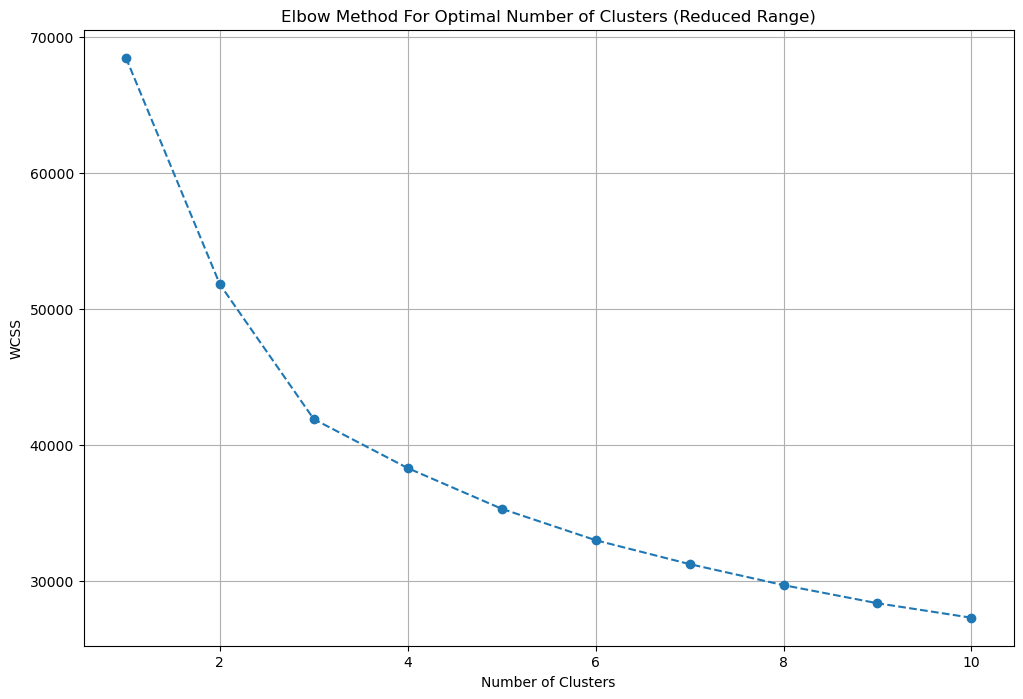

In [45]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [46]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

C:\Users\Vaibhav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [47]:
df = df.iloc[:,:-18]

In [48]:
df['furnishing_type'] = cluster_assignments

In [49]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
1825,"['1 Water Purifier', '7 Fan', '1 Exhaust Fan', '4 Geyser', '15 Light', '1 Chimney', '1 Modular Kitchen', '4 Wardrobe', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine']",0
1339,"['3 Wardrobe', '4 Fan', '7 Light', '1 Modular Kitchen', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",1
3475,"['1 Water Purifier', '1 Fan', '1 Fridge', '1 Exhaust Fan', '1 Dining Table', '1 Light', '1 AC', '1 Modular Kitchen', '1 Chimney', '1 Curtains', '1 Wardrobe', 'No Bed', 'No Geyser', 'No Microwave', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine']",2
3190,NaN,1
2921,"['4 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",1


## 5.features

In [50]:
df[['society','features']].sample(5)

,society,features
1485,hcbs sports ville,NaN
284,experion windchants,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
602,ss the leaf,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
2433,sobha city,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
3407,signature the serenas,"['Security / Fire Alarm', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"


In [51]:
df['features'].isnull().sum()

635

In [53]:
import pandas as pd
app_df = pd.read_csv('appartments.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [54]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [55]:
temp_df = df[df['features'].isnull()]

In [56]:
temp_df.shape

(635, 26)

In [57]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [58]:
df.loc[temp_df.index,'features'] = x.values

In [59]:
df['features'].isnull().sum()

481

In [61]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [62]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [63]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
2665,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0
468,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1007,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0
3745,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
378,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0


In [64]:
features_binary_df.shape

(3803, 130)

In [65]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

C:\Users\Vaibhav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Vaibhav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Vaibhav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Vaibhav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Vaibhav\anaconda3\Lib\site-packages\skl

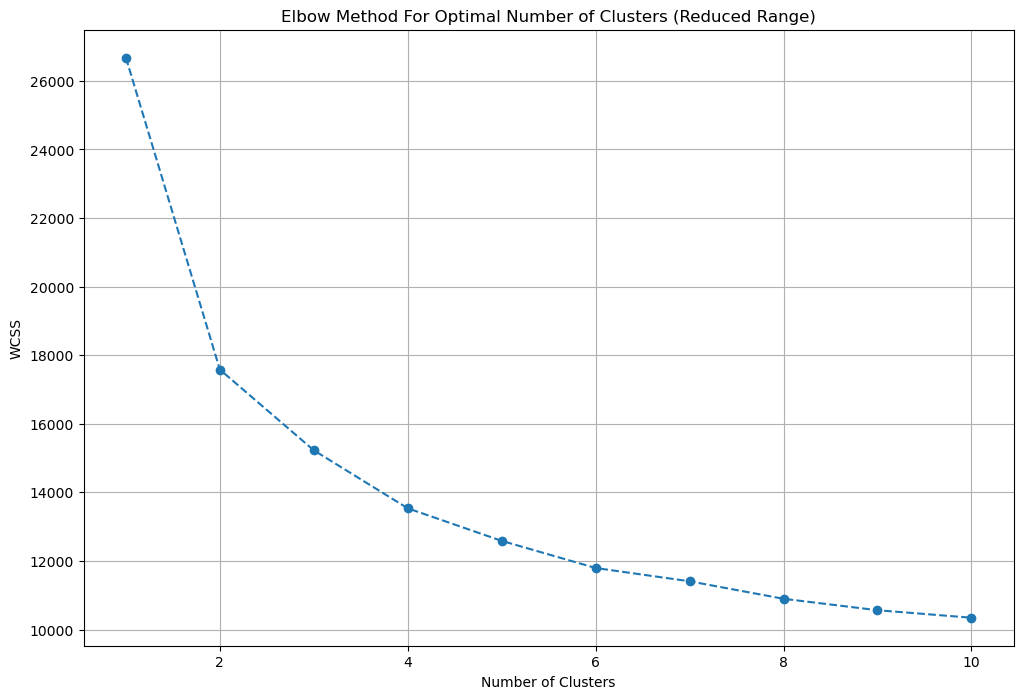

In [66]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [67]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)


In [68]:
df['luxury_score'] = luxury_score

In [69]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,flat,m3m sierra 68,sector 68,1.05,8536.0,1230.0,Super Built up area 1230(114.27 sq.m.)Built Up area: 1200 sq.ft. (111.48 sq.m.)Carpet area: 1000 sq.ft. (92.9 sq.m.),2,2,2,not available,11.0,North-East,New Property,"['Airia Mall', 'Sohna Road', 'Golf Course Extension Road', 'Alpine Convent School', 'KIIT College of Engineering', 'MKD Hospital', 'Indira Gandhi International Airport', 'Lemon Tree Hotel, Sohna Road', 'SkyJumper Trampoline Park', 'DLF Golf and Country Club']","['2 Wardrobe', '3 Fan', '1 Exhaust Fan', '1 Geyser', '1 Light', '1 Modular Kitchen', '1 Chimney', '3 Curtains', 'No AC', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Water purifier', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",1230.0,1200.0,1000.0,0,0,0,0,0,0,"[Security / Fire Alarm, Feng Shui / Vaastu Compliant, Intercom Facility, Lift(s), Water purifier, Maintenance Staff, Water Storage, No open drainage around, Piped-gas, Visitor Parking, Swimming Pool, Park, Security Personnel, Natural Light, Internet/wi-fi connectivity, Airy Rooms, Spacious Interiors, Shopping Centre, Fitness Centre / GYM, Waste Disposal, Rain Water Harvesting, Club house / Community Center, Water softening plant]",127
1,flat,aipl the peaceful homes,sector 70a,2.40,11162.0,2150.0,Super Built up area 2150(199.74 sq.m.),3,3,3,servant room,11.0,South-West,Relatively New,"['Airia Mall', 'Golf Corse Ext. Rd.', 'National Highway-48', 'Indus World School', 'Gurugram University', 'Ananta Hospital', 'Indira Gandhi International Airport', 'DLF Corporate Greens', 'IMT Manesar', 'Hyatt Regency Gurgaon', 'SkyJumper Trampoline Park']","['5 Fan', '3 Geyser', '6 Light', '3 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",2150.0,NaN,NaN,0,1,0,0,0,1,"[Security / Fire Alarm, Power Back-up, Feng Shui / Vaastu Compliant, Intercom Facility, Lift(s), High Ceiling Height, Maintenance Staff, False Ceiling Lighting, Water Storage, Separate entry for servant room, No open drainage around, Piped-gas, Visitor Parking, Swimming Pool, Park, Internet/wi-fi connectivity, Shopping Centre, Fitness Centre / GYM, Waste Disposal, Rain Water Harvesting, Club house / Community Center, Water softening plant]",108
2,flat,suncity avenue 76,sector 76,0.75,10204.0,735.0,Super Built up area 735(68.28 sq.m.),2,2,2,not available,11.0,NaN,Under Construction,"['Omaxe Gurgaon Mall', 'Gurugram University', 'Euro International School, Sector 84', 'Park Hospital', 'Indira Gandhi Intl Airport', 'Hyatt Regency Gurgaon']",[],"['School', 'High Speed Elevators', 'Creche/Day car

In [70]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [71]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
213,house,international city by sobha phase 1,sector 109,12.00,20000.0,6000.0,Plot area 8000(743.22 sq.m.)Built Up area: 7000 sq.ft. (650.32 sq.m.)Carpet area: 6000 sq.ft. (557.42 sq.m.),5,6,3,2.0,North-East,Relatively New,NaN,7000.0,6000.0,1,1,0,0,0,0,154
1243,flat,4s aradhya homes,sector 67a,1.90,8863.0,2144.0,Super Built up area 2200(204.39 sq.m.),4,4,3,3.0,NaN,New Property,2200.0,NaN,NaN,0,0,0,0,0,0,62
1711,flat,emaar mgf emerald floors premier,sector 65,2.29,13878.0,1650.0,Carpet area: 1650 (153.29 sq.m.),3,4,3+,2.0,West,Relatively New,NaN,NaN,1650.0,1,1,0,0,0,2,174
3681,flat,breez global heights,sohna road,0.26,6598.0,394.0,Carpet area: 394 (36.6 sq.m.),1,1,1,6.0,NaN,New Property,NaN,NaN,394.0,0,0,0,0,0,1,26
197,flat,adani m2k oyster grande,sector 102,2.50,7817.0,3198.0,Super Built up area 3198(297.1 sq.m.)Built Up area: 2600 sq.ft. (241.55 sq.m.)Carpet area: 2350 sq.ft. (218.32 sq.m.),4,5,3+,10.0,North-East,Relatively New,3198.0,2600.0,2350.0,0,1,0,1,0,0,174


In [72]:
df.shape

(3803, 23)

In [73]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)